<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/(i)Dimesional_reduction_techniques_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_wine=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [2]:
from sklearn.model_selection import train_test_split
X=df_wine.iloc[:,1:].values
y=df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3,stratify=y)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

#PCA(Principle Component Analysis)
Unsupervised data compression

Main idea: find orthogonal axes that has largest Variance

Step to perform PCA:
> Standardize the dataset

> Compute the covariance matrix

> Find eigien value and eigien vector of that matrix and sort

> Construct projection matrix W from top k best eigien value

> Transform original dataset with d feature to new dataset with k feature

In [4]:
def construct_projection_matrix_W(egien_value,egien_vector,k):
  egien_pair=[(np.abs(egien_value[i]),egien_vector[:,i]) for i in range(len(egien_value))]
  egien_pair.sort(key=lambda k: k[0],reverse=True)
  w=np.hstack([egien_pair[j][1][:,np.newaxis] for j in range(k)])
  return w
def present(egien_value,egien_vector):
  indice=np.argsort(egien_value)[::-1] # [::-1] mean reverse from large to small
  value=egien_value[indice]
  vector=egien_vector[indice]
  tol=sum(value)
  var_ex=[(i/tol) for i in value]
  cum_var_ex=np.cumsum(var_ex)
  plt.bar(range(1,14),var_ex,alpha=0.5,align='center',label='individual')
  plt.step(range(1,14),cum_var_ex,where='mid',label='cummulative')
  plt.legend('best')

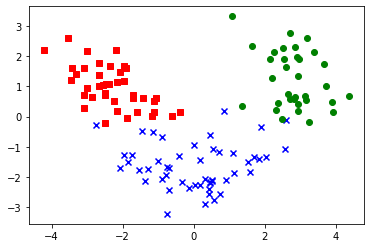

In [5]:
# Perfrom PCA
import numpy as np
import matplotlib.pyplot as plt
def pca(X,k):
  cov_matrix=np.cov(X.T)
  egien_value,egien_vector=np.linalg.eig(cov_matrix)
  w=construct_projection_matrix_W(egien_value,egien_vector,k)
  return w
def predict(X,k):
  w=pca(X_train_std,k)
  return np.dot(X,w)
X_train_pca=predict(X_train_std,2)

X_train_pca.shape
color=['r','b','g']
markers=['s','x','o']
for l,c,m in zip(np.unique(y_train),color,markers):
  plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,marker=m,label=l)


Alone the first Principle Component can explain 40% of dataset.

PCA is an unsupervised method, which ignore data label (while SBS or randomforst feature selcetion included)

Mirror projection:
> obtain egien vector v which fliped in sign (that OK!)


In [66]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

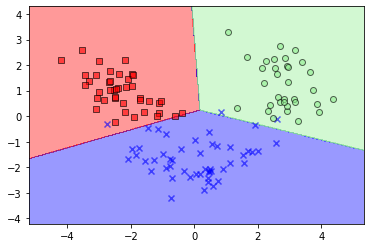

In [9]:

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr=LogisticRegression(multi_class='ovr',solver='liblinear',random_state=1)
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca,y_train,classifier=lr)


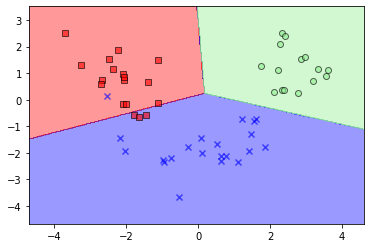

In [10]:
plot_decision_regions(X_test_pca,y_test,classifier=lr)


In [12]:
lr.coef_

array([[-1.57942129e+00,  1.37037730e+00],
       [-2.54640214e-03, -3.07934376e+00],
       [ 1.41082142e+00,  1.55697439e+00]])

In [16]:
pca=PCA(n_components=None)
pca.fit(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

#LDA(Linear Discriminant Analysis)
Supervised data compression

Main idea: find feature subspace that maximize class separability



Some assumption:
> data normally distributed

> class(label) is independent of each other

> training example are statistically independent of each other


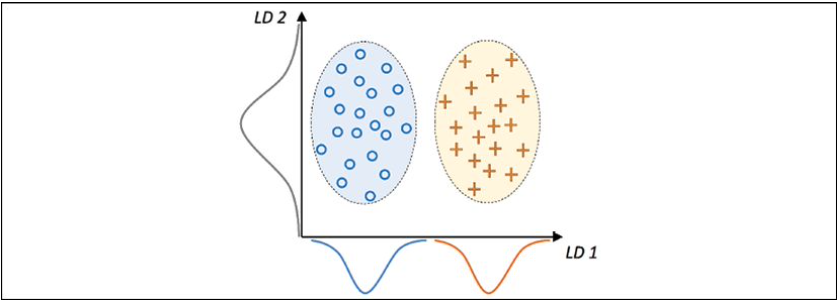

Step in LDA:
>Standardized dataset(d is number of feature)

>For each class, compute d-dimensional mean vector

>Construct between class scatter matrix(Sb) and within class scatter matrix(Sw)

>Compute the egien_value/vector of Sw^-1*Sb

>sort, choose k largest, construct W(transformation matrix)

In [3]:

m=np.vstack([np.mean(X_train_std[y_train==i],axis=0) for i in range(1,4)])

In [25]:
class_scatter=[(1/(X_train_std[y_train==i+1].shape[0]))*np.dot((X_train_std[y_train==i+1]-m[i]).T,(X_train_std[y_train==i+1]-m[i])) for i in range(3)]

Compute the convariance matrix for each class, then add up to become Sw

In [26]:
Sw1=np.zeros((13,13))
for x in class_scatter:
  Sw+=x
Sw1[0]

array([ 1.21395771,  0.0937678 , -0.12621079, -0.10876617, -0.07068877,
        0.2305392 ,  0.07315851,  0.02257099,  0.10535855,  0.41440864,
        0.13843322, -0.01589185,  0.11940009])

Faster way!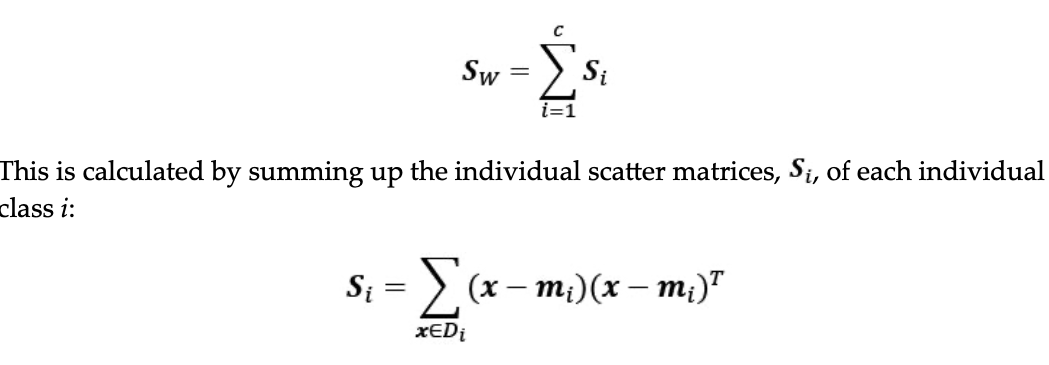

In [24]:
Sw=np.zeros((13,13))
for x in range(1,4):
  class_scatter=np.cov(X_train_std[y_train==x].T)
  Sw1+=class_scatter
Sw[0]

array([ 1.24477126,  0.09674598, -0.12761201, -0.11054946, -0.072555  ,
        0.23744246,  0.0753275 ,  0.02314745,  0.11018478,  0.42610754,
        0.14110634, -0.01554856,  0.12237558])

Compute Sb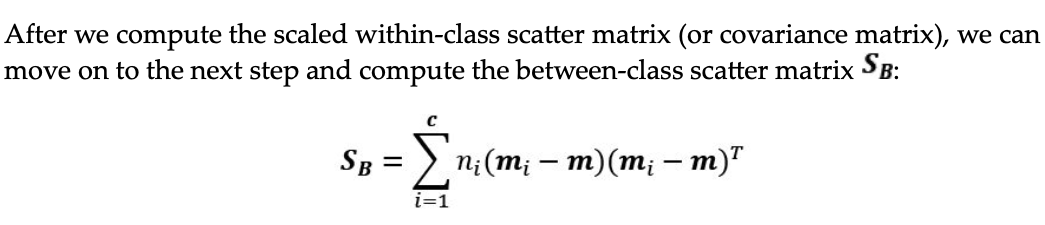

In [41]:
mean_total=np.mean(X_train_std,axis=0)
Sb=np.zeros((13,13))
for x,y in enumerate(m):
  n=X_train_std[y_train==x+1,:].shape[0]
  m_vec=y.reshape(13,1)
  mean_total=mean_total.reshape(13,1)
  Sb+=n*np.dot(m_vec-mean_total,(m_vec-mean_total).T)
Sb

array([ 73.27794894,   5.15208214,  29.34088701, -37.80525118,
        35.32883124,  27.86879784,  24.40371442, -10.9170498 ,
        11.92933234,  51.2815813 ,   0.21976199,  -0.34448852,
        73.97113514])

Find egien value, egien vector of 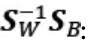

In [43]:
egien_vals,egien_vecs=np.linalg.eig(np.dot(np.linalg.inv(Sw),Sb))

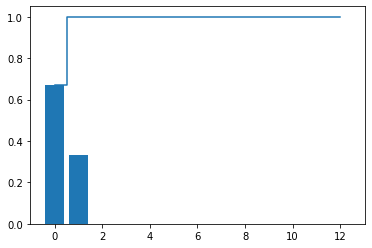

In [54]:

egien_pair=[(np.abs(egien_vals[i]),egien_vecs[:,i]) for i in range(len(egien_vals))]
egien_pair.sort(key=lambda k:k[0], reverse=True)
tol=sum(egien_vals.real)
v_exp=[egien_pair[i][0]/tol for i in range(len(egien_vals))]
v_exp
plt.bar(range(len(egien_vals)), v_exp)
cummulative=np.cumsum(v_exp)
plt.step(range(len(egien_vals)), cummulative,where='mid')

In [55]:
egien_pair[0][1].shape

(13,)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


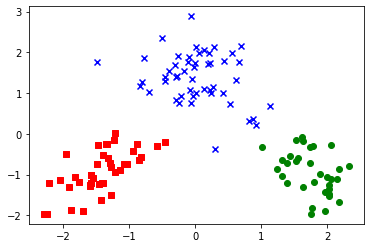

In [63]:
W=np.hstack([egien_pair[i][1][:,np.newaxis] for i in range(2)])
def transform(X):
  return X@W
X_LDA=transform(X_train_std)
X_LDA.shape
color=['r','b','g']
markers=['s','x','o']
for l,c,m in zip(np.unique(y_train),color,markers):
  plt.scatter(X_LDA[y_train==l,0],X_LDA[y_train==l,1],c=c,marker=m,label=l)

Use lib to use LDA

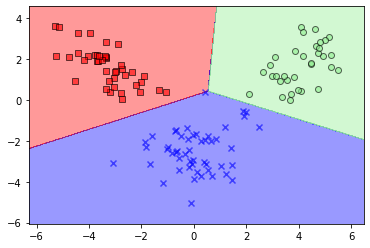

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as l
lda=LDA(n_components=2)
X_train_lda=lda.fit_transform(X_train_std,y_train)
X_test_lda=lda.transform(X_test_std)
lr=l(random_state=1,solver='lbfgs',multi_class='ovr')
lr.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)

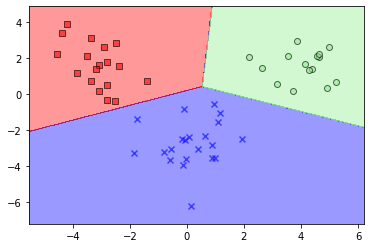

In [70]:
plot_decision_regions(X_test_lda, y_test, classifier=lr)

#KPCA(kernel PCA)

use to deal with non-linear dataset(where PCA and LDA not the choice)

transform non_linear data -> linear data (higher in dim)

In [71]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [83]:
def rbf_kernel_pca(X,gamma, n_components):
  sq_dists = pdist(X, 'sqeuclidean')
  mat_sq_dists = squareform(sq_dists)
  K = exp(-gamma * mat_sq_dists)
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  # Obtaining eigenpairs from the centered kernel matrix # scipy.linalg.eigh returns them in ascending order 
  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
  X_pc = np.column_stack([eigvecs[:, i]for i in range(n_components)])
  return X_pc

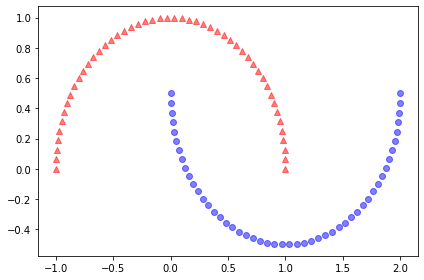

In [73]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()


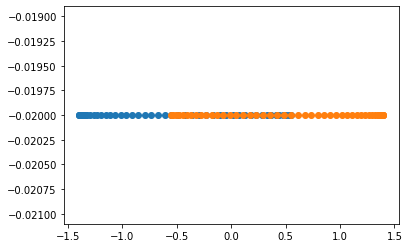

In [81]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
X_pca=pca.fit_transform(X)
plt.scatter(X_pca[y==1, 0], np.zeros((50,1))-0.02)
plt.scatter(X_pca[y==0, 0], np.zeros((50,1))-0.02)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  after removing the cwd from sys.path.


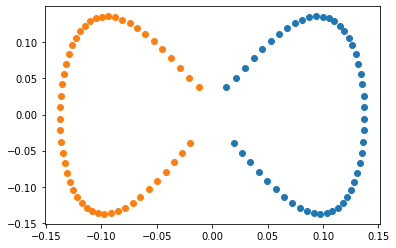

In [85]:
X_kpca=rbf_kernel_pca(X,gamma=15, n_components=2)
plt.scatter(X_kpca[y==1, 0],X_kpca[y==1, 1])
plt.scatter(X_kpca[y==0, 0],X_kpca[y==0, 1])

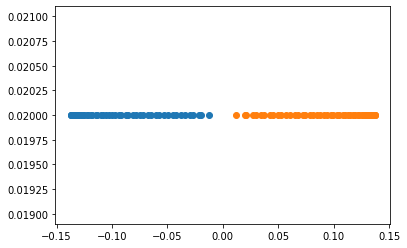

In [86]:
plt.scatter(X_kpca[y==0, 0],np.zeros((50,1))+0.02)
plt.scatter(X_kpca[y==1, 0],np.zeros((50,1))+0.02)

In [87]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)


In [ ]:
from sklearn.decomposition import KernelPCA